# 0. Simulate real signal data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 0.1 Pure signal data

Text(0, 0.5, 'amplitude')

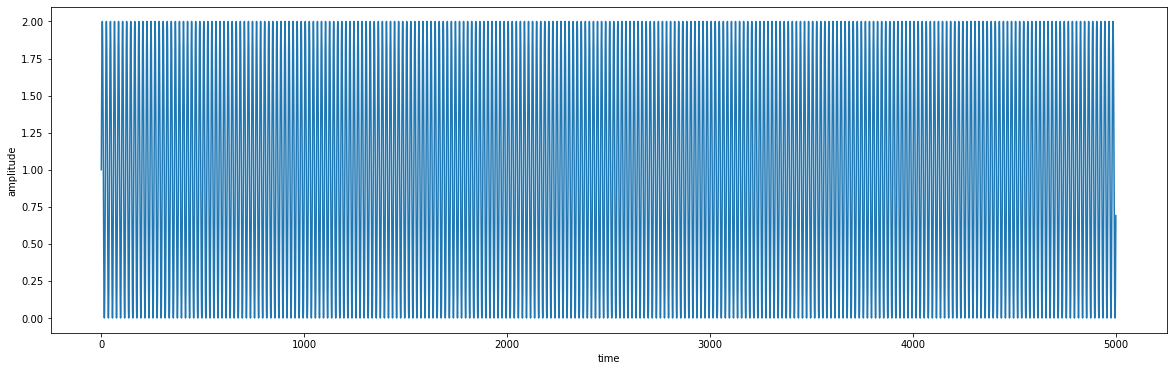

In [27]:
# define parameters
time=5000
x =np.arange(time)
freq = 10

# sine wave
amp=np.sin(2*np.pi*freq*(x/200))+1

plt.figure(figsize=(20,6))
plt.plot(x,amp)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.2 Noise form

Text(0, 0.5, 'amplitude')

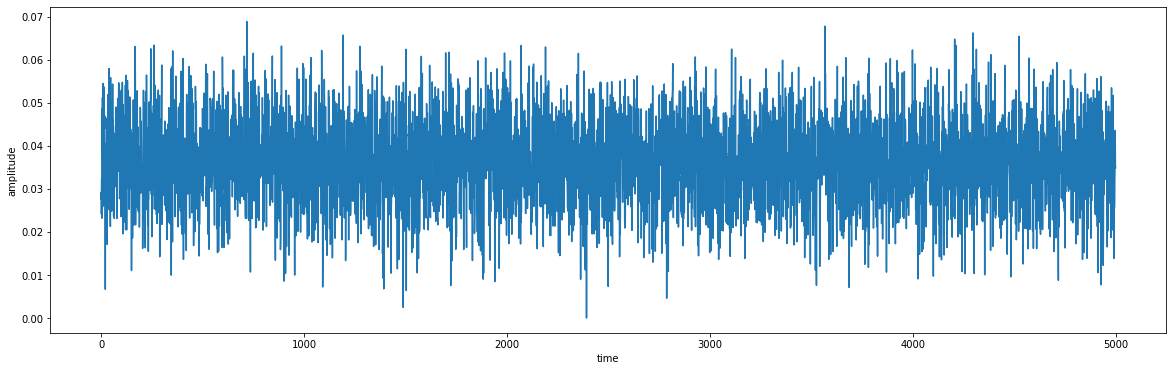

In [41]:
rd=np.random.normal(size=time,)/100
nf=np.max(rd)-rd
plt.figure(figsize=(20,6))
plt.plot(nf)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.3 Pure + Noise 

Text(0, 0.5, 'amplitude')

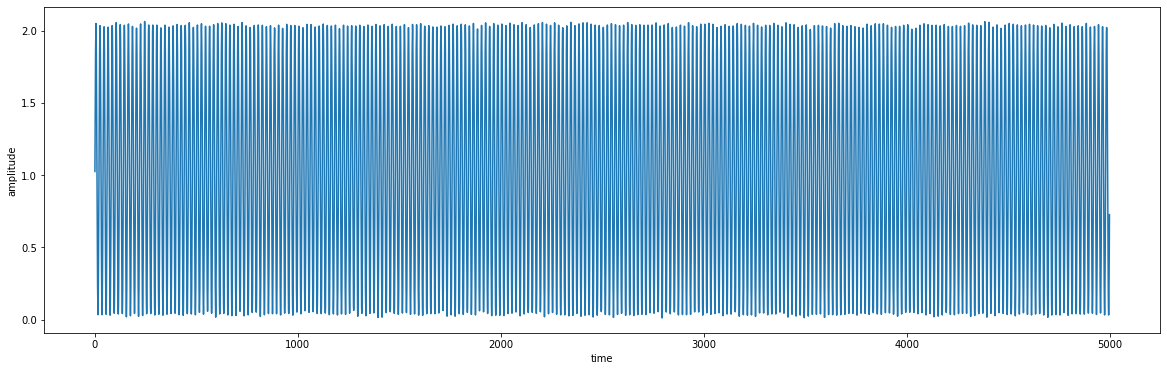

In [42]:
sig = nf+amp

plt.figure(figsize=(20,6))
plt.plot(x,sig)
plt.xlabel('time')
plt.ylabel('amplitude')

In [46]:
print('Min of sig = '+str(np.min(sig)))

min of sig = 0.010797545436624794


## 0.4 Lose form

In [9]:
#parameters
sigma=50 #50
mu=100 #100
sizeLoss=10000 #10000
#time parameter
x=np.arange(-(time-(time-mu)),(time-mu))
#x=np.arange(-100,10000)
#print(x.size)

#gausian distribution
#ga=((1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2)))
gau=-((1/np.sqrt(2*np.pi*sigma**2))*np.exp((-(x-mu)**2)/(2*sigma**2)))*sizeLoss
print(gau)
print(x)

[-0.02676605 -0.02898951 -0.03138513 ... -0.         -0.
 -0.        ]
[-100  -99  -98 ... 4897 4898 4899]


Text(0, 0.5, 'loss signal data')

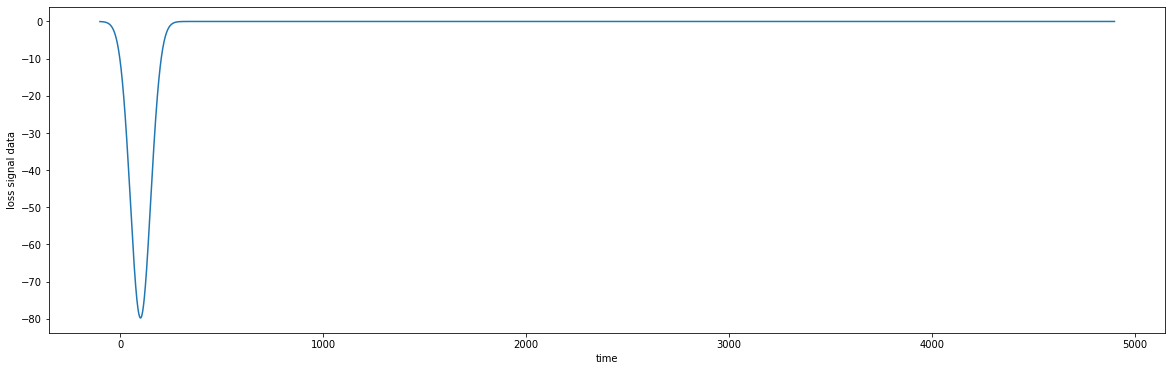

In [10]:
plt.figure(figsize=(20,6))
plt.plot(x,gau)
plt.xlabel('time')
plt.ylabel('loss signal data')

# 0.5 Real signal data

Text(0, 0.5, 'loss signal data')

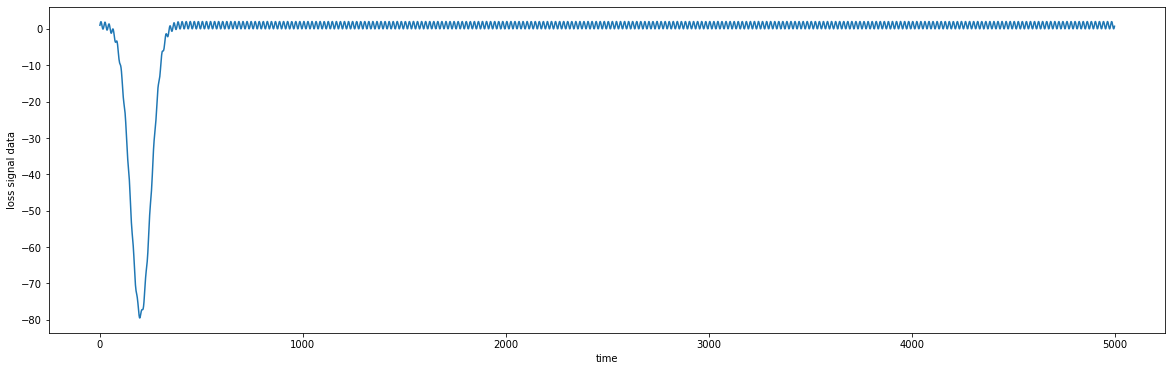

In [36]:
real=amp+rd+gau

plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

# 1. Statistical analysis of the signal

## 1.1 Pure+Noise

Text(0, 0.5, 'amplitude')

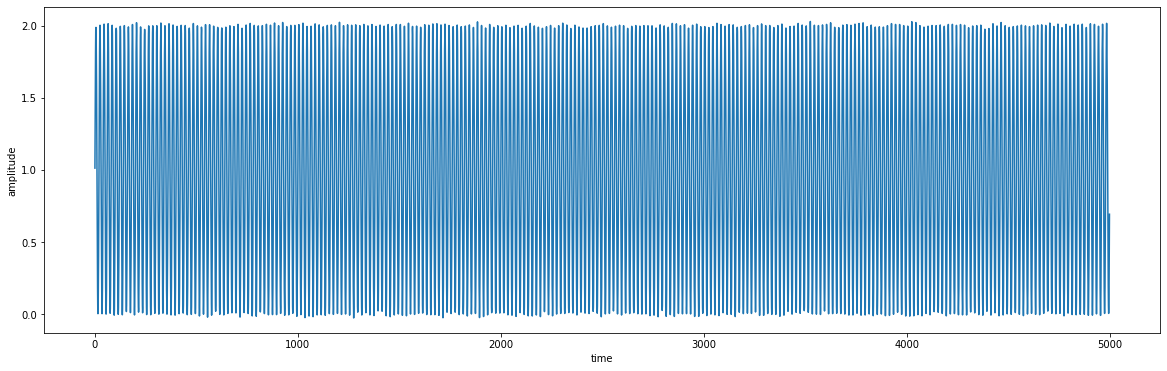

In [47]:
sig = rd+amp

plt.figure(figsize=(20,6))
plt.plot(x,sig)
plt.xlabel('time')
plt.ylabel('amplitude')

In [12]:
print('Mean = '+ np.mean(real)

SyntaxError: unexpected EOF while parsing (<ipython-input-12-37d6174869f9>, line 1)

In [19]:
type(A)

numpy.ndarray

In [20]:
np.mean(sig,axis=4)

IndexError: tuple index out of range

In [23]:
A = np.array([1,2,3])
type(A)

numpy.ndarray

In [18]:
np.mean(A)

2.0

In [25]:
np.transpose(sig).mean()

-0.0019514105836795598

In [26]:
np.transpose(real).mean()

-2.0018907090195612